In [1]:
import pandas as pd
from pandas.io.json import json_normalize 
import numpy as np
import json
import urllib.request

In [2]:
API_url = "https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=TSLA&interval=5min&outputsize=full&apikey=VOI03MVRS6FO3IWR"

In [3]:
with urllib.request.urlopen(API_url) as response:
   data_1 = json.loads(response.read())

In [4]:
df = pd.DataFrame()
for key in data_1['Time Series (Daily)']:
    x = json_normalize(data=data_1['Time Series (Daily)'][key])
    x['Time'] = key
    df = df.append(x,sort=False)
df = df.reset_index()

In [5]:
df.head()

,index,1. open,2. high,3. low,4. close,5. volume,Time
0,0,507.6100,515.6699,503.1600,510.5000,13399785,2020-01-17
1,0,493.7500,514.4600,492.1700,513.4900,21736653,2020-01-16
2,0,529.7600,537.8400,516.7853,518.5000,17368831,2020-01-15
3,0,544.2550,547.4100,524.9000,537.9200,29061377,2020-01-14
4,0,493.5000,525.6300,492.0000,524.8600,26307458,2020-01-13


In [6]:
df['daily_return'] = pd.to_numeric(df['4. close']).pct_change(-1)

In [7]:
df['timestamp'] = pd.to_datetime(df['Time'])

In [8]:
df = df.drop(columns = ['Time'])

In [9]:
df.head()

,index,1. open,2. high,3. low,4. close,5. volume,daily_return,timestamp
0,0,507.6100,515.6699,503.1600,510.5000,13399785,-0.005823,2020-01-17
1,0,493.7500,514.4600,492.1700,513.4900,21736653,-0.009662,2020-01-16
2,0,529.7600,537.8400,516.7853,518.5000,17368831,-0.036102,2020-01-15
3,0,544.2550,547.4100,524.9000,537.9200,29061377,0.024883,2020-01-14
4,0,493.5000,525.6300,492.0000,524.8600,26307458,0.097689,2020-01-13


In [10]:
df = df.sort_values(by = ['timestamp']).reset_index()

In [11]:
df.head()

,level_0,index,1. open,2. high,3. low,4. close,5. volume,daily_return,timestamp
0,2405,0,19.0000,25.0000,17.5400,23.8900,18766300,NaN,2010-06-29
1,2404,0,25.7900,30.4192,23.3000,23.8300,17187100,-0.002512,2010-06-30
2,2403,0,25.0000,25.9200,20.2700,21.9600,8218800,-0.078473,2010-07-01
3,2402,0,23.0000,23.1000,18.7100,19.2000,5139800,-0.125683,2010-07-02
4,2401,0,20.0000,20.0000,15.8300,16.1100,6866900,-0.160937,2010-07-06


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2406 entries, 0 to 2405
Data columns (total 9 columns):
level_0         2406 non-null int64
index           2406 non-null int64
1. open         2406 non-null object
2. high         2406 non-null object
3. low          2406 non-null object
4. close        2406 non-null object
5. volume       2406 non-null object
daily_return    2405 non-null float64
timestamp       2406 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 169.3+ KB


In [13]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

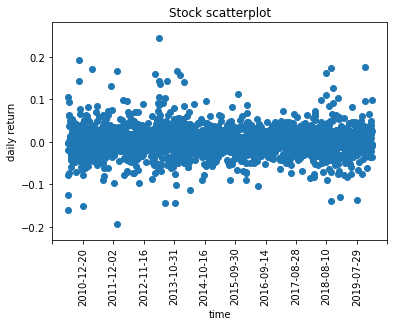

In [14]:
# create a figure and axis
fig, ax = plt.subplots()

# scatter the sepal_length against the sepal_width
ax.scatter(df['timestamp'].astype('str'), df['daily_return'])
# set a title and labels
ax.set_title('Stock scatterplot')
ax.set_xlabel('time')
ax.set_ylabel('daily return')
plt.xticks(rotation=90)
xmin, xmax = ax.get_xlim()
ax.set_xticks(np.round(np.linspace(xmin, xmax, 12), 2))
plt.show()

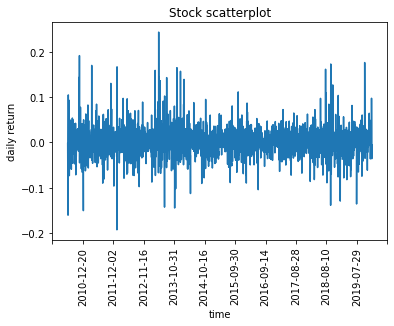

In [15]:
# create a figure and axis
fig, ax = plt.subplots()

# scatter the sepal_length against the sepal_width
ax.plot(df['timestamp'].astype('str'), df['daily_return'])
# set a title and labels
ax.set_title('Stock scatterplot')
ax.set_xlabel('time')
ax.set_ylabel('daily return')
xmin, xmax = ax.get_xlim()
plt.xticks(rotation=90)
ax.set_xticks(np.round(np.linspace(xmin, xmax, 12), 2))
plt.show()

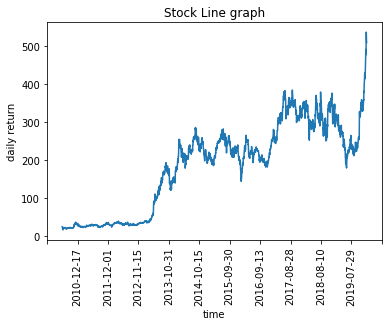

In [16]:
# create a figure and axis
fig, ax = plt.subplots()

# scatter the sepal_length against the sepal_width
ax.plot(df['timestamp'].astype('str'), df['4. close'].astype('float'))
# set a title and labels
ax.set_title('Stock Line graph')
ax.set_xlabel('time')
ax.set_ylabel('daily return')
xmin, xmax = ax.get_xlim()
plt.xticks(rotation=90)
ax.set_xticks(np.round(np.linspace(xmin, xmax, 12), 2))
plt.show()

In [17]:
df[['1. open', '2. high', '3. low', '4. close', '5. volume']] = df[['1. open', '2. high', '3. low', '4. close', '5. volume']].apply(pd.to_numeric) 
print(df.dtypes) 

level_0                  int64
index                    int64
1. open                float64
2. high                float64
3. low                 float64
4. close               float64
5. volume                int64
daily_return           float64
timestamp       datetime64[ns]
dtype: object


In [18]:
import seaborn as sns

C:\Users\mistr\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


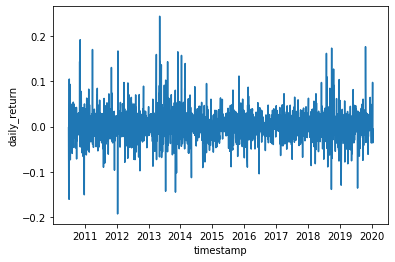

In [19]:
sns.lineplot(x='timestamp', y='daily_return', data=df)

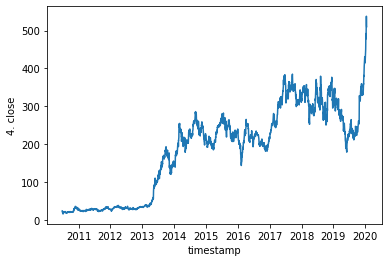

In [20]:
sns.lineplot(x='timestamp', y='4. close', data=df)

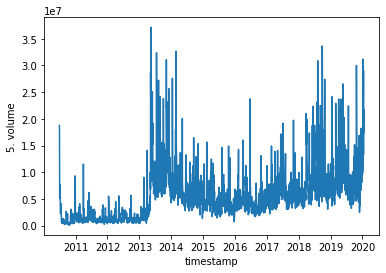

In [21]:
sns.lineplot(x='timestamp', y='5. volume', data=df)

In [22]:
from sklearn import preprocessing

In [23]:
df = df.drop(columns = ['level_0', 'index'])

In [27]:
df.describe()

,1. open,2. high,3. low,4. close,5. volume,daily_return
count,2406.000000,2406.000000,2406.000000,2406.000000,2.406000e+03,2405.000000
mean,184.613611,187.821741,181.276832,184.671702,5.499145e+06,0.001796
std,116.112925,117.949446,114.244953,116.226035,4.838383e+06,0.032469
min,16.140000,16.630000,14.980000,15.800000,1.185000e+05,-0.193274
25%,34.270000,34.855000,33.565000,34.380000,1.883677e+06,-0.014300
50%,212.575000,216.494950,208.420000,212.325000,4.547366e+06,0.000845
75%,264.752500,269.419975,260.752500,265.417500,7.309598e+06,0.018021
max,544.255000,547.410000,524.900000,537.920000,3.716390e+07,0.244029


In [32]:
len(df)*0.7

1684.1999999999998

In [37]:
train_df = df.drop(columns = ['timestamp']).values[:1684]

In [38]:
test_df = df.drop(columns = ['timestamp']).values[1684:]

In [39]:
train_df

array([[ 1.90000000e+01,  2.50000000e+01,  1.75400000e+01,
         2.38900000e+01,  1.87663000e+07,             nan],
       [ 2.57900000e+01,  3.04192000e+01,  2.33000000e+01,
         2.38300000e+01,  1.71871000e+07, -2.51151109e-03],
       [ 2.50000000e+01,  2.59200000e+01,  2.02700000e+01,
         2.19600000e+01,  8.21880000e+06, -7.84725136e-02],
       ...,
       [ 2.50740000e+02,  2.51900000e+02,  2.49000000e+02,
         2.51570000e+02,  2.92923400e+06,  4.35164484e-03],
       [ 2.47910000e+02,  2.51700000e+02,  2.47510000e+02,
         2.51210000e+02,  3.35550000e+06, -1.43101324e-03],
       [ 2.51920000e+02,  2.53890000e+02,  2.48320000e+02,
         2.48590000e+02,  3.45947000e+06, -1.04295211e-02]])

In [40]:
#data_normaliser = preprocessing.MinMaxScaler()
#data_normalised = data_normaliser.fit_transform(df.drop(columns = ['timestamp']))

In [41]:
#type(data_normalised)

numpy.ndarray

In [43]:
data_normalizer = preprocessing.MinMaxScaler()
train_data = train_df.reshape(-1,1)
test_data = test_df.reshape(-1,1)

In [47]:
train_data.shape

(10104, 1)

In [48]:
# Train the Scaler with training data and smooth data
smoothing_window_size = 2500
for di in range(0,10000,smoothing_window_size):
    data_normalizer.fit(train_data[di:di+smoothing_window_size,:])
    train_data[di:di+smoothing_window_size,:] = data_normalizer.transform(train_data[di:di+smoothing_window_size,:])

# You normalize the last bit of remaining data
data_normalizer.fit(train_data[di+smoothing_window_size:,:])
train_data[di+smoothing_window_size:,:] = data_normalizer.transform(train_data[di+smoothing_window_size:,:])

In [49]:
train_data

array([[1.02275217e-06],
       [1.34247423e-06],
       [9.44953142e-07],
       ...,
       [1.66711300e-05],
       [2.31941823e-01],
       [3.59542355e-09]])

In [50]:
# Reshape both train and test data
train_data = train_data.reshape(-1)

# Normalize test data
test_data = data_normalizer.transform(test_data).reshape(-1)

In [ ]:
# Perform exponential moving average smoothing(Only on train data)
# So the data will have a smoother curve than the original ragged data
EMA = 0.0
gamma = 0.1
for ti in range(11000):
  EMA = gamma*train_data[ti] + (1-gamma)*EMA
  train_data[ti] = EMA

# Used for visualization and test purposes
all__data = np.concatenate([train_data,test_data],axis=0)